In [14]:
'''
Reproducing results from the following paper:
    [1] P. Bak and K. Sneppen, Punctuated equilibrium and criticality in a simple model of evolution, Phys. Rev. Lett. 71 (1993) 4083.
'''

import numpy as np
import random
from matplotlib import pyplot as plt

In [43]:
species_count = 4069
iteration_count = 1000000

species_fitness = np.random.rand((species_count))
mutated = []
dists = []
mutated_barriers = []
dt = []
tc = 0.01

weakest = np.argmin(species_fitness)
mutated.append(weakest)
mutated_barriers.append(species_fitness[weakest])
species_fitness[weakest] = random.random()
species_fitness[(weakest + 1) % species_fitness.size] = random.random()
species_fitness[(weakest - 1) % species_fitness.size] = random.random()

for _ in range(iteration_count - 1):
    weakest = np.argmin(species_fitness)
    dists.append(min(abs(weakest - mutated[-1]), abs(weakest + species_fitness.size - mutated[-1]), abs(weakest - species_fitness.size - mutated[-1])))
    mutated.append(weakest)
    mutated_barriers.append(species_fitness[weakest])
    species_fitness[weakest] = random.random()
    species_fitness[(weakest + 1) % species_fitness.size] = random.random()
    species_fitness[(weakest - 1) % species_fitness.size] = random.random()
    

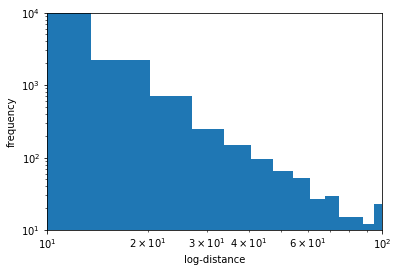

In [44]:
'''
    This plot represents the hypothesis that when a species mutates, the next species to mutate will be 
    close to it in terms of "distance"
'''
plt.hist(dists, 300, log = True)
plt.xscale('log')
plt.xlim(10, 100)
plt.ylim(10, 10000)
plt.xlabel('log-distance')
plt.ylabel('frequency')
plt.show()

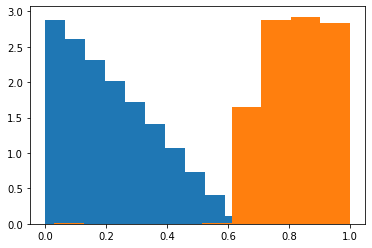

In [46]:
plt.hist(mutated_barriers, density=True)
plt.hist(species_fitness, density=True)
plt.show()